In [11]:
import random

import numpy as np
import matplotlib.pyplot as plt

In [23]:
class KMeans:
    def cal_dist(self, p0, p1):
        """
        比較兩點的距離
        """
        return np.sqrt(np.sum((p0-p1)**2))

    def kmeans(self, datapoints, k=2):
        # 定義資料維度
        d = datapoints.shape[1]
        # 最大的迭代次數
        Max_Iterations = 1000

        cluster = np.zeros(datapoints.shape[0])
        prev_cluster = np.ones(datapoints.shape[0])

        cluster_centers = []
        for i in range(k):
            cluster_centers += [random.choice(datapoints)]

        iteration = 0
        while np.array_equal(cluster, prev_cluster) is False or iteration > Max_Iterations:
            iteration += 1
            prev_cluster = cluster.copy()

            # 將每一個點做分群
            for idx, point in enumerate(datapoints):
                min_dist = float("inf")
                for c, cluster_center in enumerate(cluster_centers):
                    dist = self.cal_dist(point, cluster_center)
                    if dist < min_dist:
                        min_dist = dist  
                        cluster[idx] = c   # 指定該點屬於哪個分群

            # 更新分群的中心
            for k in range(len(cluster_centers)):
                new_center = np.zeros(d)
                members = 0
                for point, c in zip(datapoints, cluster):
                    if c == k:
                        new_center += point
                        members += 1

                new_center = new_center / members
                cluster_centers[k] = new_center


    #     print("======== Results ========")
    #     print("Clusters", cluster_centers)
    #     print("Iterations", iteration) 
    #     print("Assignments", cluster) 
    #     plt.scatter(datapoints[:, 0], datapoints[:, 1], c=cluster)
    #     plt.show()

        return cluster

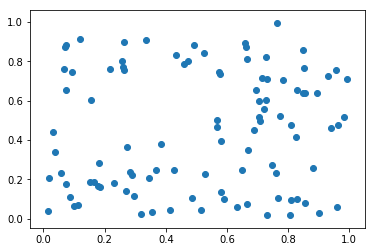

In [24]:
datapoints = np.random.rand(100, 2)
plt.scatter(datapoints[:, 0], datapoints[:, 1])

In [25]:
K = KMeans()
K.kmeans(datapoints)

array([0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.])